# Predictive Maintenance Solution

## 1. Installing required libraries

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib


  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (322 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using ca

## 2. Import Necessary Libraries



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import joblib


## 3. Load and Preprocess Data


In [34]:
# 3. Load and Preprocess Data
columns = ['unit_number', 'time_in_cycles'] + \
          [f'op_setting_{i}' for i in range(1, 4)] + \
          [f'sensor_{i}' for i in range(1, 22)]

train = pd.read_csv('train_FD001.txt', delim_whitespace=True, header=None)
train.columns = columns

test = pd.read_csv('test_FD001.txt', delim_whitespace=True, header=None)
test.columns = columns
rul = pd.read_csv('RUL_FD001.txt', delim_whitespace=True, header=None, names=['RUL'])


/tmp/ipykernel_2004834/181268880.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_csv('train_FD001.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_2004834/181268880.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv('test_FD001.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_2004834/181268880.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rul = pd.read_csv('RUL_FD001.txt', delim_whitespace=True, header=None, names=['RUL'])


## 4. Data Preprocessing

#### Calculate Remaining Useful Life (RUL) for Training Data:

In [47]:
train.describe()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [35]:
# Calculate RUL for the training set
rul_train = train.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul_train.columns = ['unit_number', 'max_cycles']
train = train.merge(rul_train, on='unit_number')
train['RUL'] = train['max_cycles'] - train['time_in_cycles']
train.drop('max_cycles', axis=1, inplace=True)

# Correlation Handling (Dropping highly correlated features)
correlation_matrix = train.drop(['unit_number', 'time_in_cycles', 'RUL'], axis=1).corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Set a threshold for dropping highly correlated features (e.g., 0.85)
high_correlation_threshold = 0.85
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > high_correlation_threshold)]
train_cleaned = train.drop(to_drop, axis=1)

## 5. Feature and Target Selection


In [36]:
X_train = train_cleaned.drop(['unit_number', 'time_in_cycles', 'RUL'], axis=1)
y_train = train_cleaned['RUL']

# Prepare the test set in a similar way (dropping correlated features)
X_test = test.groupby('unit_number').last().reset_index(drop=True)
X_test_cleaned = X_test.drop(to_drop + ['unit_number', 'time_in_cycles'], axis=1, errors='ignore')

# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_cleaned)


## 6. Enhanced EDA


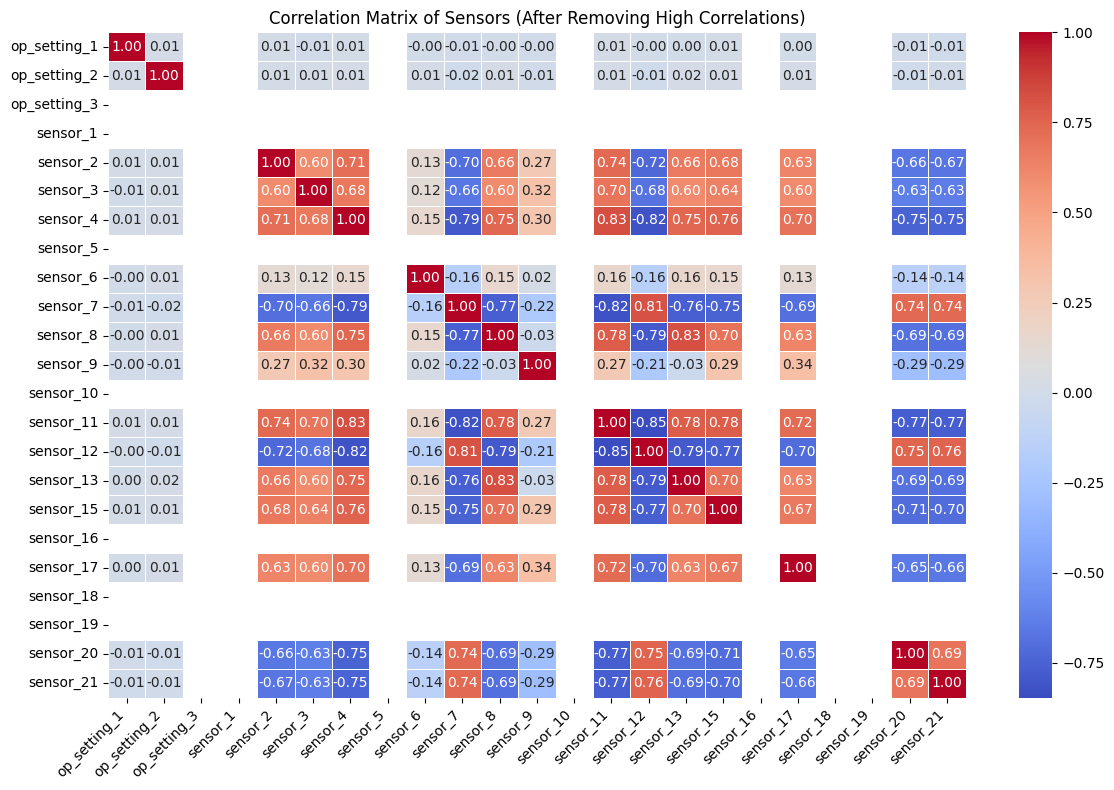

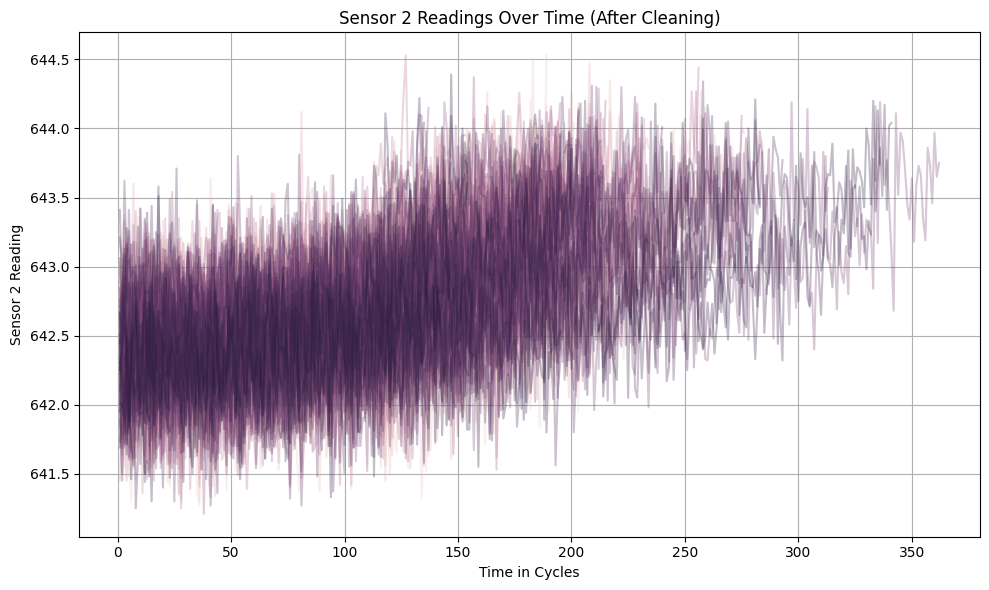

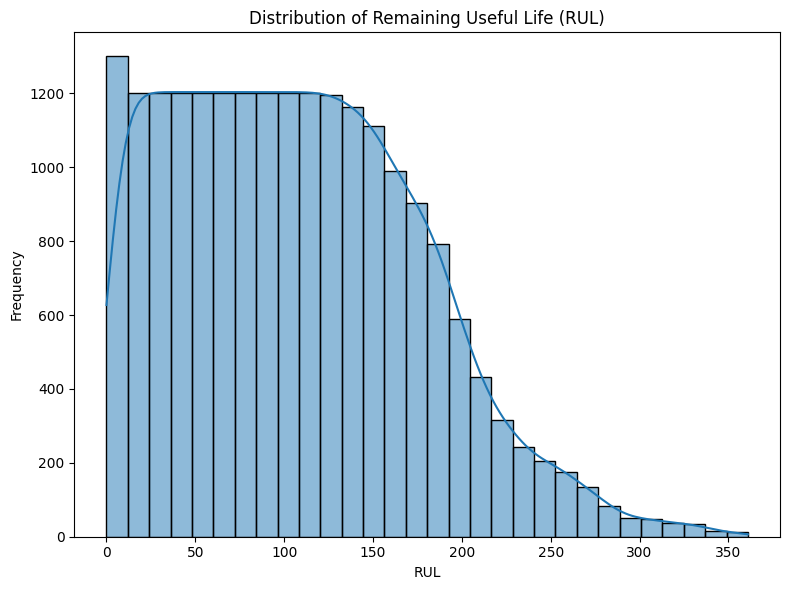

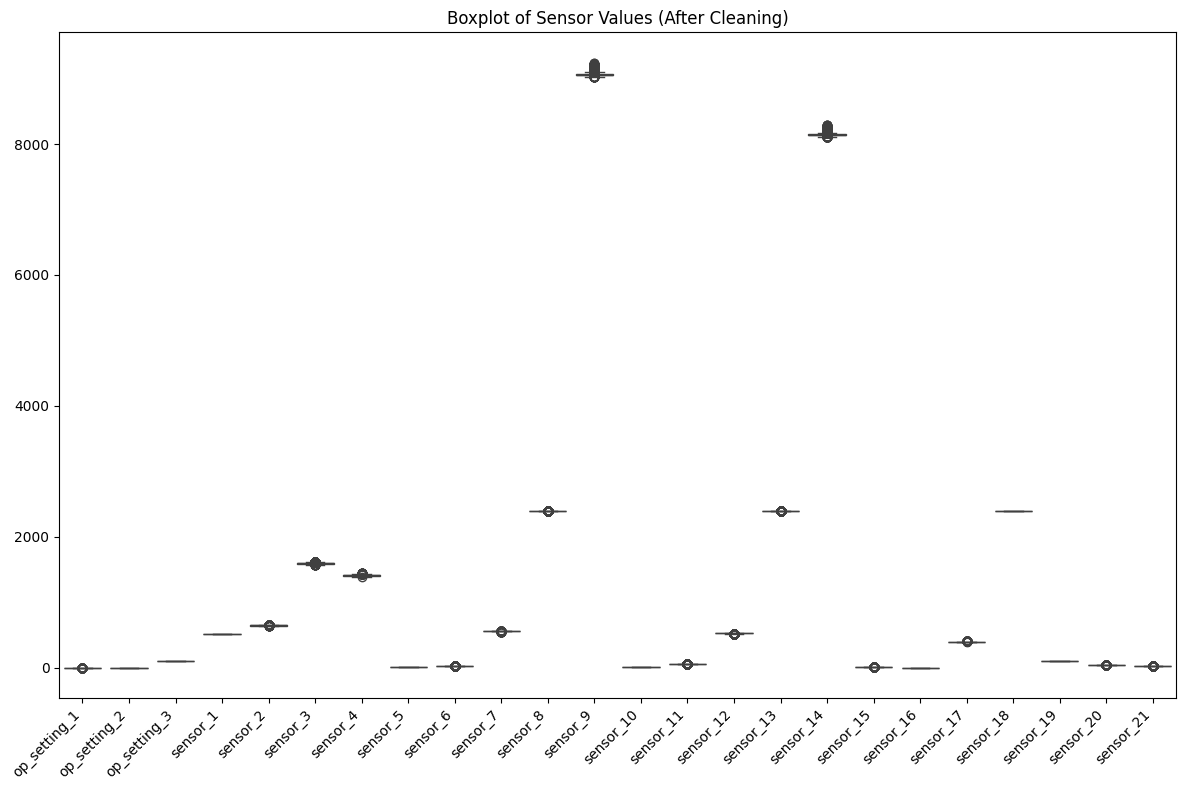

In [42]:



# 6.1 Improved Correlation Heatmap (after dropping highly correlated features)
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sensors (After Removing High Correlations)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6.2 Sensor 2 Readings Over Time - Aggregated to Reduce Overplotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_cleaned, x='time_in_cycles', y='sensor_2', hue='unit_number', legend=None, alpha=0.3)
plt.title('Sensor 2 Readings Over Time (After Cleaning)')
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor 2 Reading')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6.3 Histogram of RUL values to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(train['RUL'], bins=30, kde=True)
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6.4 Boxplot of Sensor Values to Identify Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=train.drop(['unit_number', 'time_in_cycles', 'RUL'], axis=1))
plt.title('Boxplot of Sensor Values (After Cleaning)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Model Training (RandomForest with Randomized Search for Hyperparameter Tuning)


In [38]:
# 7. Model Training (RandomForest with RandomizedSearchCV for Hyperparameter Tuning)
model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # A broader range of n_estimators
    'max_depth': [10, 20, 30, 40, None],  # None allows the tree to grow until all leaves are pure
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
}

# Randomized Search with 100 iterations
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    error_score='raise'
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Extract the best model and print results
best_model = random_search.best_estimator_
print(f"Best parameters found: {random_search.best_params_}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   6.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   6.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   6.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   6.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=  10.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=

/home/harshad/Music/second_case_study/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  24.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  24.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  25.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  25.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=  15.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=  16.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=  16.3s
[CV] END max_depth=None, max_fe

## 8. Model Evaluation


Mean Squared Error: 999.91
Mean Absolute Error: 23.10
R^2 Score: 0.42


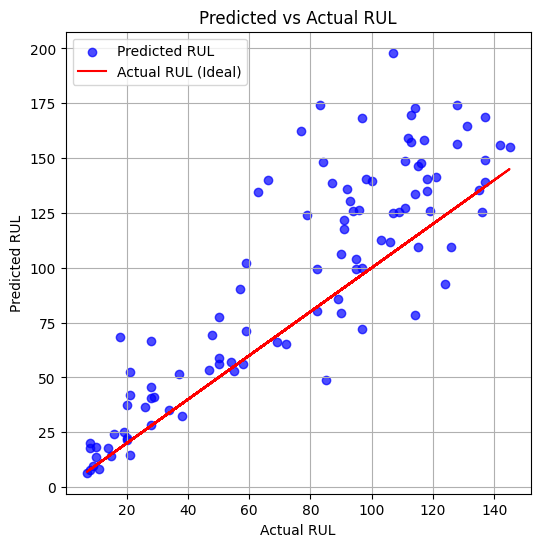

In [41]:
# 8. Model Evaluation
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(rul['RUL'], y_pred)
mae = mean_absolute_error(rul['RUL'], y_pred)
r2 = r2_score(rul['RUL'], y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Save predictions
predictions = pd.DataFrame({'Actual_RUL': rul['RUL'], 'Predicted_RUL': y_pred})
predictions.to_csv('predictions.csv', index=False)

# Plotting Predicted vs Actual RUL with Different Colors
plt.figure(figsize=(6, 6))
plt.scatter(rul['RUL'], y_pred, alpha=0.7, c='blue', label='Predicted RUL')
plt.plot(rul['RUL'], rul['RUL'], color='red', label='Actual RUL (Ideal)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Predicted vs Actual RUL')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# 9. Save the Trained Model


In [40]:

joblib.dump(best_model, 'rul_model.pkl')

# Save predictions
predictions = pd.DataFrame({'Actual_RUL': rul['RUL'], 'Predicted_RUL': y_pred})
predictions.to_csv('predictions.csv', index=False)
